Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.57      0.31      0.40        13

    accuracy                           0.68        37
   macro avg       0.64      0.59      0.59        37
weighted avg       0.65      0.68      0.65        37



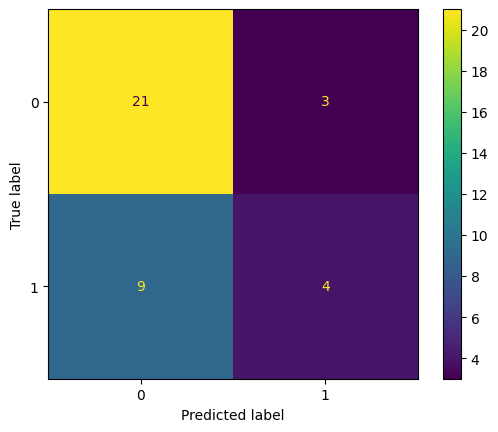

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load audio feature mapping
df = pd.read_csv(r"C:\Users\IQAC\Documents\voice\final\audio_feature_mapping.csv")

# Feature extraction
def extract_statistics(feature_path):
    try:
        df_feat = pd.read_csv(feature_path)
        stats = []
        for col in df_feat.columns:
            series = df_feat[col]
            stats.extend([
                series.mean(), series.std(),
                series.min(), series.max(),
                series.median()
            ])
        return np.array(stats)
    except Exception as e:
        print(f"Error processing {feature_path}: {e}")
        return np.zeros(28 * 5)  # Fallback for 28 columns

# Extract features and labels
X = []
y = []

for index, row in df.iterrows():
    X.append(extract_statistics(row['Feature_CSV_Path']))
    y.append(row['Label'])

X = np.array(X)
y = np.array(y)

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [5]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']